# Implementasi Gradient Descent

## Membuat Scatter Plot
Import data x.csv sebagai input variable dan y.csv sebagai output variable lalu lakukan scatterplot terhadap kedua variabel ini

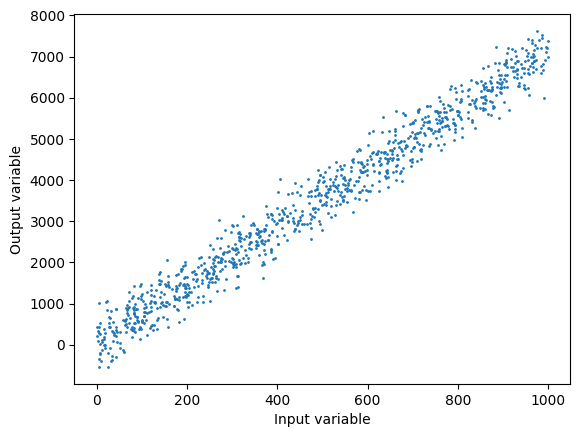

In [1]:
import csv
import matplotlib.pyplot as plt

x_file = open("x.csv", "r")
data_x = list(csv.reader(x_file, delimiter=","))

y_file = open("y.csv", "r")
data_y = list(csv.reader(y_file, delimiter=","))

plt.xlabel("Input variable")
plt.ylabel("Output variable")

plt.scatter(data_x, data_y, s=1)
plt.show()

## Algoritma Gradient Descent

Rancang sebuah fungsi GradDesc(x, y, numIterations, alpha) 
Keterangan Input Fungsi: 
x adalah vektor variabel input 
y adalah vektor variabel output 

Keterangan Output Fungsi: 
Fungsi mengoutputkan 2 buah vektor dengan panjang numIterations: 
Vektor theta0: kumpulan nilai theta0 hasil iterasi Gradient Descent 
Vektor theta1: kumpulan nilai theta1 hasil iterasi Gradient Descent 

Konvergensi didefinisikan secara sederhana, yaitu juga total iterasi sudah mencapai numIterations 
alpha adalah learning rate 



In [2]:
import numpy as np

In [3]:
x = np.array(data_x[0], dtype=float)
y = np.array(data_y[0], dtype=float)

array([9.73194811e+02, 4.91403720e+02, 3.99922353e+02, 8.24593682e+02,
       2.02066418e+02, 7.57763495e+02, 5.38070675e+02, 2.82477633e+02,
       7.41590532e+02, 3.88973534e+02, 7.72234650e+02, 8.55422563e+02,
       7.51621779e+02, 2.68110724e+02, 3.38568378e+02, 5.86128851e+02,
       2.51657354e+02, 5.92503698e+02, 1.98739780e+02, 6.64079290e+02,
       6.62135525e+02, 3.91144306e+02, 1.16739439e+02, 1.32490774e+02,
       3.87333244e+02, 7.88397925e+02, 3.41472844e+02, 1.99213699e+02,
       3.01115698e+02, 6.94705336e+02, 1.99434330e+02, 3.92678134e+02,
       3.59503090e+02, 1.20263567e+02, 4.24650394e+02, 8.26055329e+01,
       9.09678272e+02, 4.00879567e+02, 6.13175695e+02, 2.96685729e+02,
       6.99690672e+01, 4.47521386e+02, 7.58269908e+02, 1.67768278e+02,
       2.80176968e+02, 1.58228353e+02, 3.05869051e+02, 2.46061576e+02,
       3.88185970e+02, 3.16928087e+02, 4.83915002e+02, 9.06040100e+02,
       7.00636194e+02, 9.99505009e+02, 5.95626601e+02, 9.58182648e+02,
      

In [4]:
m = len(x)

# Gradient Descent

def hypothesis(x, theta0, theta1):
    return theta0 + theta1 * x

def GradDesc(x, y, numIterations, alpha):
    theta0 = [0]
    theta1 = [0]
    
    for i in range(numIterations):
        theta0.append(theta0[i] - (alpha * (1/m) * np.sum(hypothesis(x, theta0[i], theta1[i]) - y)))
        theta1.append(theta1[i] - (alpha * (1/m) * np.sum((hypothesis(x, theta0[i], theta1[i]) - y) * x)))
    
    return theta0, theta1


## Hasil Gradient Descent
Untuk permulaan, pilih nilai hyperparameter berikut: 
Nilai awal theta0 dan thetha1 adalah keduanya 0 

numIterations = 100 
alpha = 1e-7 

Terapkan fungsi Gradient Descent Anda untuk data latih yang sudah diberikan. 

Plot kembali data latih beserta grafik model linear dengan parameter hasil Gradient Descent pada iterasi terakhir. 

0.01253482950646855 7.148473016027852


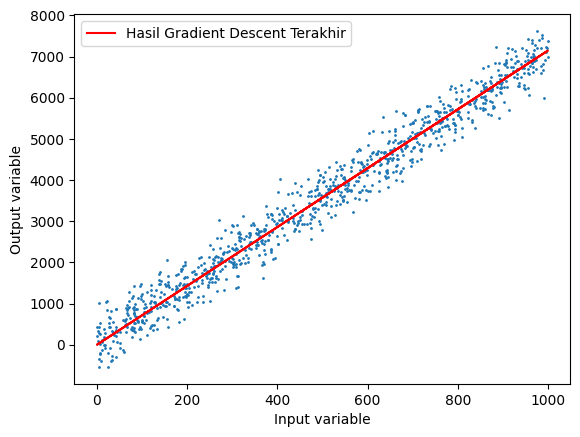

In [5]:
numIterations = 1000
alpha = 1e-7

theta0_list, theta1_list = GradDesc(x, y, numIterations, alpha)
theta0 = theta0_list[-1]
theta1 = theta1_list[-1]
print(theta0, theta1)

y = []
for i in range(m):
    y.append(theta0 + (theta1 * x[i]))
    

plt.xlabel("Input variable")
plt.ylabel("Output variable")

plt.scatter(data_x, data_y, s=1)
plt.plot(x, y, color='r', label='Hasil Gradient Descent Terakhir')
plt.legend(loc='upper left')
plt.show()

## Progress Pembelajaran Gradient Descent

Dari NumIterations kali iterasi, tampilkan progress pembelajaran algoritma untuk 10 milestones: yaitu mulai dari iterasi 0 dan bertambah 11.11% dari progress keseluruhan. 

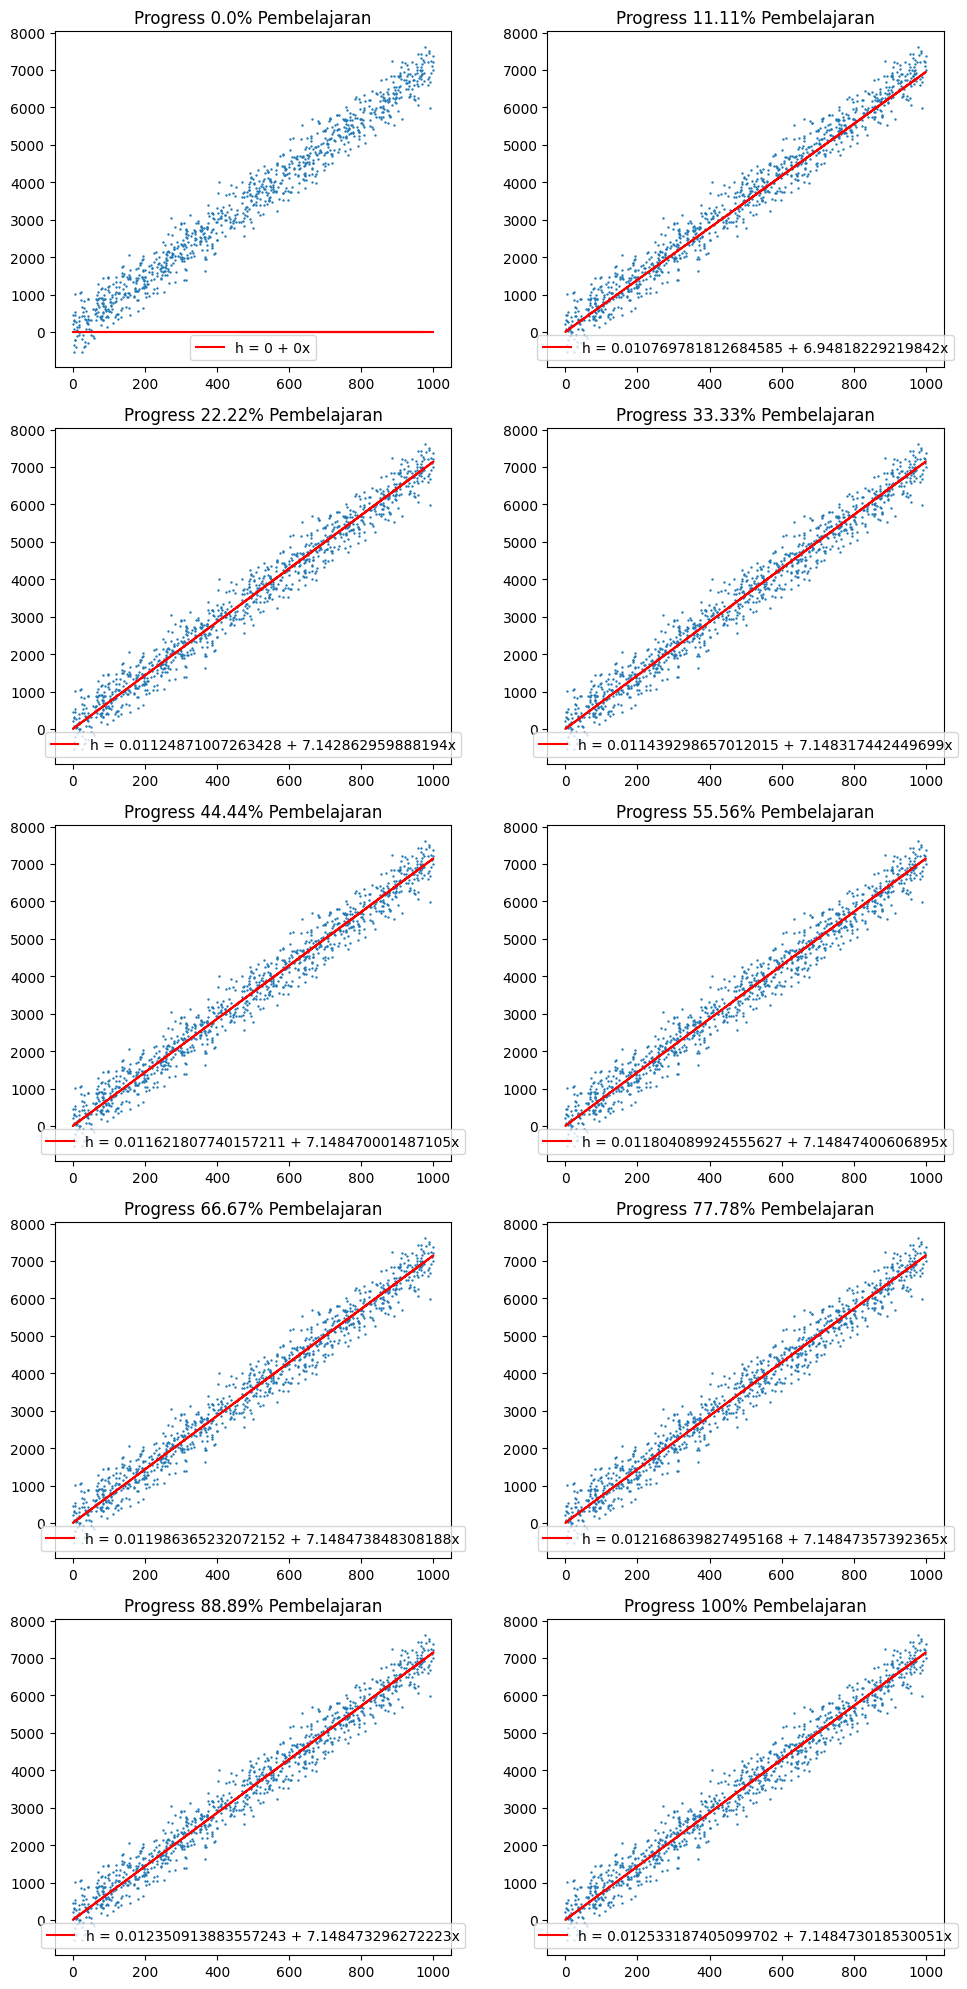

In [6]:
def getAllTheta(theta0, theta1, progress):
    all_theta0 = []
    all_theta1 = []
    for i in progress:
        all_theta0.append(theta0[i])
        all_theta1.append(theta1[i])
    return all_theta0, all_theta1
    
def linearFunction(x, theta0, theta1):
    y_linear = []
    for i in range(m):
        y_linear.append(theta0 + (theta1 * x[i]))    
    return y_linear
    
def PlotProgress(x, y, theta0, theta1):
    progress = range(0, len(theta0) + 1, len(theta0) // 9)
    fig, axs = plt.subplots(5, 2, figsize=(10,20))
    
    all_theta0, all_theta1 = getAllTheta(theta0, theta1, progress)
    
    percentage = [0.0, 11.11, 22.22, 33.33, 44.44, 55.56, 66.67, 77.78, 88.89, 100]
    
    for i in range(5):
        for j in range(2):
            step = 2*i + j
            axs[i, j].scatter(data_x, data_y, s = 0.5)
            ### Jawaban
            axs[i, j].plot(x, linearFunction(x, all_theta0[step], all_theta1[step]), color='r', label=f"h = {all_theta0[step]} + {all_theta1[step]}x")
            axs[i, j].set_title(f"Progress {percentage[step]}% Pembelajaran")
            axs[i, j].legend(loc='lower center')
            
    fig.tight_layout()
    
PlotProgress(x, y, theta0_list, theta1_list)

Tampilkan grafik learning curve, yaitu besarnya fungsi biaya dari progress model linear terhadap iterasi. 

<function matplotlib.pyplot.show(close=None, block=None)>

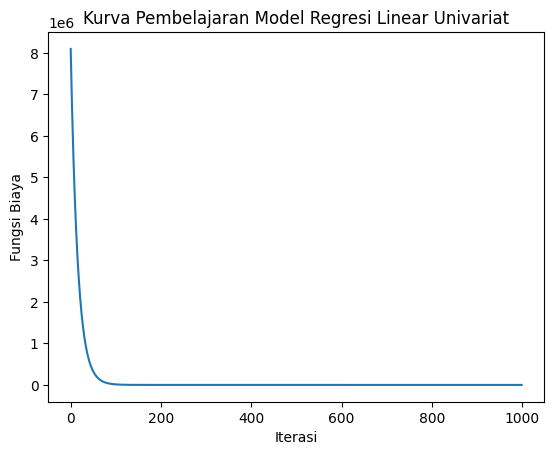

In [7]:
def hypothesis(x, theta0, theta1):
    return theta0 + theta1 * x

def cost_function(x, y, theta0, theta1):
    return 1/(2*m) * np.sum((hypothesis(x, theta0, theta1) - y)**2)

y_learn_curve = [cost_function(x, y, theta0_list[i], theta1_list[i]) for i in range(numIterations)]
plt.plot(y_learn_curve)

plt.title("Kurva Pembelajaran Model Regresi Linear Univariat")
plt.xlabel("Iterasi")
plt.ylabel("Fungsi Biaya")
plt.show

## Eksplorasi NumIterations

Dengan tetap memilih nilai alpha yang sama, kerjakan kembali algoritma Gradient Descent untuk: 
- NumIterations = 10 
- NumIterations = 1000 

Tampilkan plot data latih dan hasil model linear dari kedua nilai hyper parameter tersebut.

0.0029992610948232586 1.9683025023270764


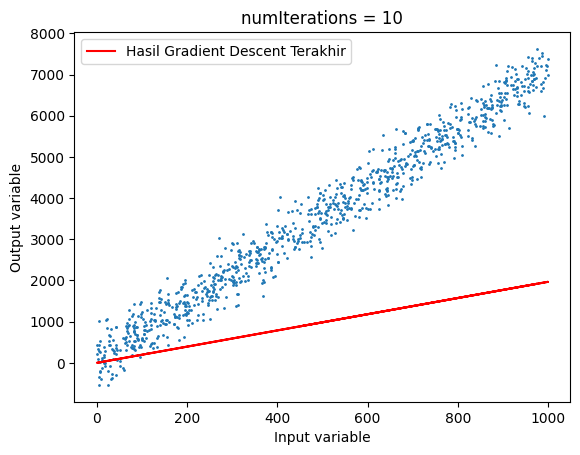

In [8]:
# Eksplorasi 1

numIterations = 10
alpha = 1e-7

theta0_list, theta1_list = GradDesc(x, y, numIterations, alpha)
theta0 = theta0_list[-1]
theta1 = theta1_list[-1]
print(theta0, theta1)

y_linear = []
for i in range(m):
    y_linear.append(theta0 + (theta1 * x[i]))
    
plt.title("numIterations = 10")
plt.xlabel("Input variable")
plt.ylabel("Output variable")

plt.scatter(data_x, data_y, s=1)
plt.plot(x, y_linear, color='r', label='Hasil Gradient Descent Terakhir')
plt.legend(loc='upper left')
plt.show()


0.010892749844798422 7.148475518196487


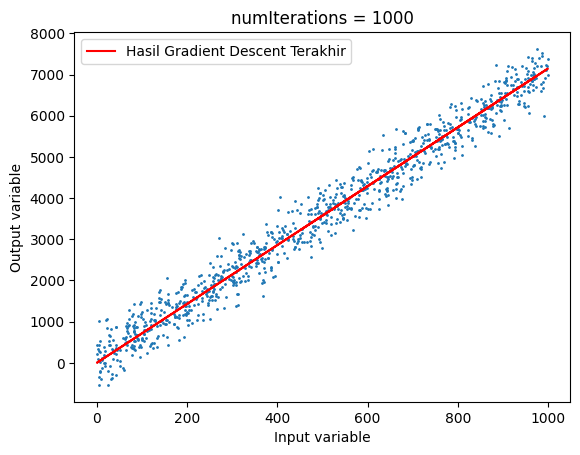

In [9]:
# Eksplorasi 1

numIterations = 1000
alpha = 1e-7


theta0_list, theta1_list = GradDesc(x, y, numIterations, alpha)
theta0 = theta0_list[-1]
theta1 = theta1_list[-1]
print(theta0, theta1)

y_linear = []
for i in range(m):
    y_linear.append(theta0 + (theta1 * x[i]))
    
plt.title("numIterations = 1000")
plt.xlabel("Input variable")
plt.ylabel("Output variable")

plt.scatter(data_x, data_y, s=1)
plt.plot(x, y_linear, color='r', label='Hasil Gradient Descent Terakhir')
plt.legend(loc='upper left')
plt.show()


## Eksplorasi Alpha
Dengan tetap memilih nilai numIterations yang sama, kerjakan kembali algoritma Gradient Descent untuk: 
- alpha = 1e-8 
- alpha = 1e-5 

Tampilkan plot data latih dan hasil model linear dari kedua nilai hyper parameter tersebut.

0.002962648437031664 1.944274985518475


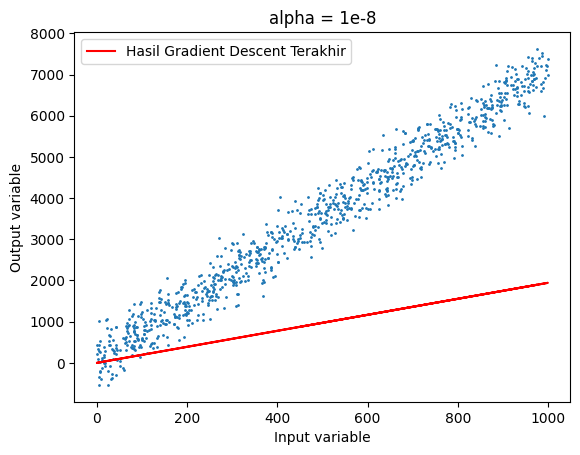

In [10]:
# Eksplorasi 2

numIterations = 100
alpha = 1e-8

theta0_list, theta1_list = GradDesc(x, y, numIterations, alpha)
theta0 = theta0_list[-1]
theta1 = theta1_list[-1]
print(theta0, theta1)

y_linear = []
for i in range(m):
    y_linear.append(theta0 + (theta1 * x[i]))
    
plt.title("alpha = 1e-8")
plt.xlabel("Input variable")
plt.ylabel("Output variable")

plt.scatter(data_x, data_y, s=1)
plt.plot(x, y_linear, color='r', label='Hasil Gradient Descent Terakhir')
plt.legend(loc='upper left')
plt.show()


-4.667080378290272e+31 -3.0628301522056127e+34


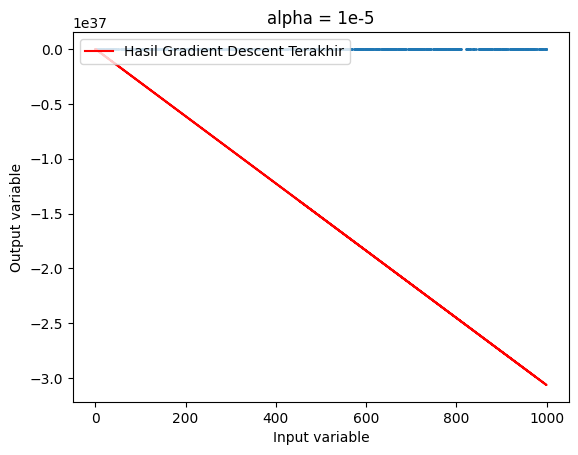

In [11]:
# Eksplorasi 2

numIterations = 100
alpha = 1e-5

theta0_list, theta1_list = GradDesc(x, y, numIterations, alpha)
theta0 = theta0_list[-1]
theta1 = theta1_list[-1]
print(theta0, theta1)

y_linear = []
for i in range(m):
    y_linear.append(theta0 + (theta1 * x[i]))
    
plt.title("alpha = 1e-5")
plt.xlabel("Input variable")
plt.ylabel("Output variable")

plt.scatter(data_x, data_y, s=1)
plt.plot(x, y_linear, color='r', label='Hasil Gradient Descent Terakhir')
plt.legend(loc='upper left')
plt.show()


## Gradient Descent Keseluruhan

Gunakan kode di bawah ini untuk membuat sebuah data latih acak dengan menggunakan tanggal lahir, bulan lahir, dan NIM anggota kelompok sebagai seed. Lakukan kembali proses Gradient Descent dengan memilih alpha dan numIterations yang tepat. 

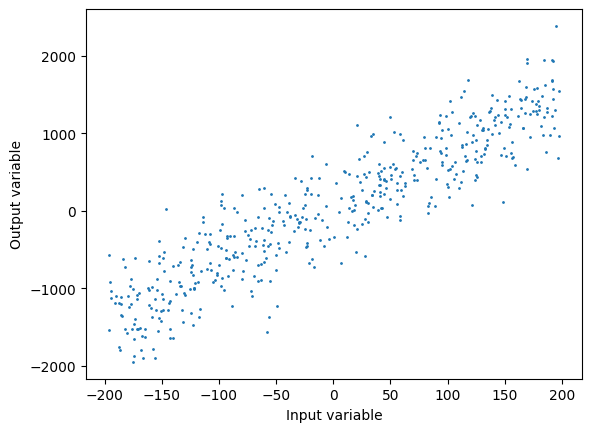

In [12]:
import matplotlib.pyplot as plt

rataan_tgl_lahir = 25
rataan_bln_lahir = 7
jumlah_3_dig_terakhir_nim = 198

m = 500 
x = np.random.uniform(-jumlah_3_dig_terakhir_nim, jumlah_3_dig_terakhir_nim, m) 
y = rataan_tgl_lahir + ((-1)**jumlah_3_dig_terakhir_nim) * rataan_bln_lahir * x 
bound = (max(y)-min(y)) / 8
y += np.random.normal(0, bound, m) 

### Jawaban
plt.xlabel("Input variable")
plt.ylabel("Output variable")

plt.scatter(x, y, s=1)
plt.show()

In [13]:
# Gradient Descent

def hypothesis(x, theta0, theta1):
    return theta0 + theta1 * x

def GradDesc(x, y, numIterations, alpha):
    theta0 = [0]
    theta1 = [0]
    
    for i in range(numIterations):
        theta0.append(theta0[i] - (alpha * (1/m) * np.sum(hypothesis(x, theta0[i], theta1[i]) - y)))
        theta1.append(theta1[i] - (alpha * (1/m) * np.sum((hypothesis(x, theta0[i], theta1[i]) - y) * x)))
    
    return theta0, theta1


0.04090921855387538 7.1606545752069


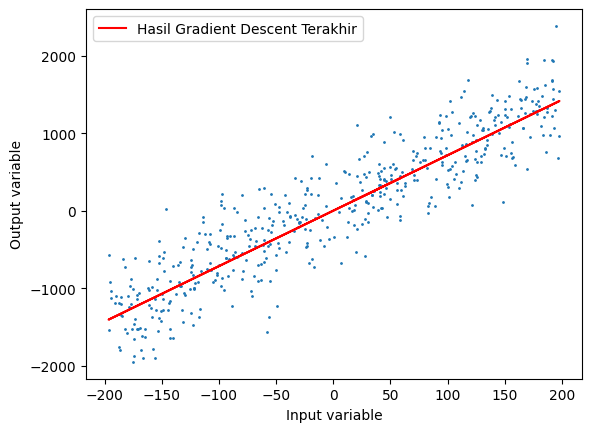

In [14]:
numIterations = 1024
alpha = 1e-6

theta0_list, theta1_list = GradDesc(x, y, numIterations, alpha)
theta0 = theta0_list[-1]
theta1 = theta1_list[-1]
print(theta0, theta1)

y_linear = []
for i in range(m):
    y_linear.append(theta0 + (theta1 * x[i]))
    

plt.xlabel("Input variable")
plt.ylabel("Output variable")

plt.scatter(x, y, s=1)
plt.plot(x, y_linear, color='r', label='Hasil Gradient Descent Terakhir')
plt.legend(loc='upper left')
plt.show()

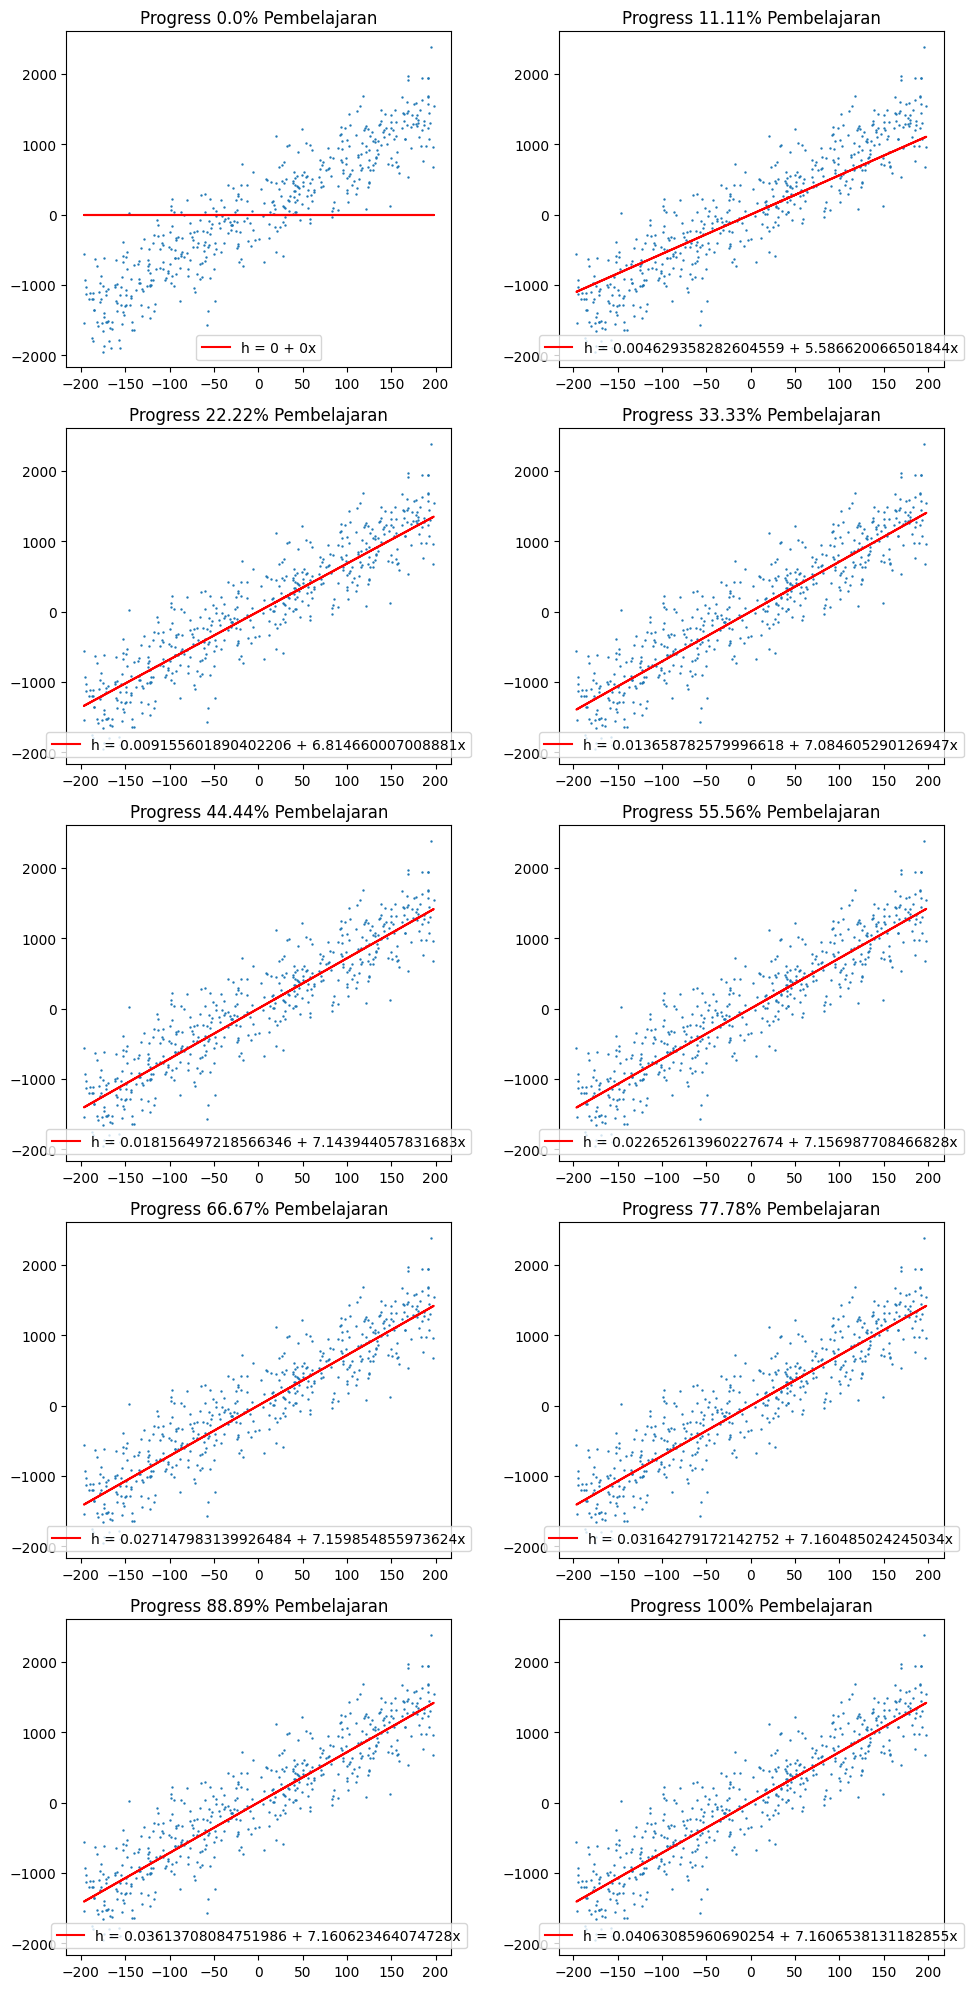

In [15]:
def getAllTheta(theta0, theta1, progress):
    all_theta0 = []
    all_theta1 = []
    for i in progress:
        all_theta0.append(theta0[i])
        all_theta1.append(theta1[i])
    return all_theta0, all_theta1
    
def linearFunction(x, theta0, theta1):
    y_linear = []
    for i in range(m):
        y_linear.append(theta0 + (theta1 * x[i]))    
    return y_linear
    
def PlotProgress(x, y, theta0, theta1):
    progress = range(0, len(theta0) + 1, len(theta0) // 9)
    fig, axs = plt.subplots(5, 2, figsize=(10,20))
    
    all_theta0, all_theta1 = getAllTheta(theta0, theta1, progress)
    
    percentage = [0.0, 11.11, 22.22, 33.33, 44.44, 55.56, 66.67, 77.78, 88.89, 100]
    
    for i in range(5):
        for j in range(2):
            step = 2*i + j
            axs[i, j].scatter(x, y, s = 0.5)
            ### Jawaban
            axs[i, j].plot(x, linearFunction(x, all_theta0[step], all_theta1[step]), color='r', label=f"h = {all_theta0[step]} + {all_theta1[step]}x")
            axs[i, j].set_title(f"Progress {percentage[step]}% Pembelajaran")
            axs[i, j].legend(loc='lower center')
            
    fig.tight_layout()
    
PlotProgress(x, y, theta0_list, theta1_list)

<function matplotlib.pyplot.show(close=None, block=None)>

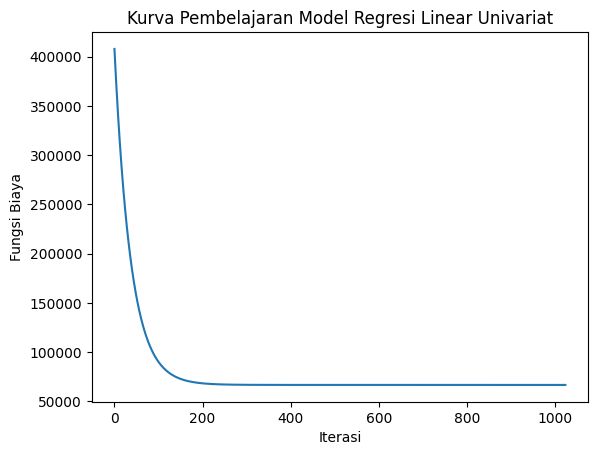

In [16]:
def hypothesis(x, theta0, theta1):
    return theta0 + theta1 * x

def cost_function(x, y, theta0, theta1):
    return 1/(2*m) * np.sum((hypothesis(x, theta0, theta1) - y)**2)

y_learn_curve = [cost_function(x, y, theta0_list[i], theta1_list[i]) for i in range(numIterations)]
plt.plot(y_learn_curve)

plt.title("Kurva Pembelajaran Model Regresi Linear Univariat")
plt.xlabel("Iterasi")
plt.ylabel("Fungsi Biaya")
plt.show